In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import joblib

In [2]:
dt = pd.read_csv("coment.csv")
dt

,comment,rating,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Проблемы
0,спасибо,5,1.0,0.0,0.0,0.0,0.0,0.0
1,спасибо!,5,1.0,0.0,0.0,0.0,0.0,0.0
2,Отлично,5,1.0,0.0,0.0,0.0,0.0,0.0
3,Благодарю за оперативное решение проблемы !,5,1.0,0.0,0.0,1.0,0.0,0.0
4,Прекрасный специалист! Побольше таких,5,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2363,"долго, но приятно",5,1.0,1.0,0.0,0.0,1.0,0.0
2364,16.03.2024 г ребята установили кондиционер. ра...,5,1.0,1.0,1.0,0.0,1.0,0.0
2365,два дня мусоропровод. сегодня с утра тоже,5,0.0,0.0,0.0,0.0,0.0,1.0
2366,отрегулировать дверь замки . для должного откр...,5,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
dt["comment"] = dt["comment"].str.lower()
dt

,comment,rating,Вопрос решен,Нравится качество выполнения заявки,Нравится качество работы сотрудников,Нравится скорость отработки заявок,Понравилось выполнение заявки,Негативные и неинформативные
0,спасибо,5,1.0,0.0,0.0,0.0,0.0,0.0
1,спасибо!,5,1.0,0.0,0.0,0.0,0.0,0.0
2,отлично,5,1.0,0.0,0.0,0.0,0.0,0.0
3,благодарю за оперативное решение проблемы !,5,1.0,0.0,0.0,1.0,0.0,0.0
4,прекрасный специалист! побольше таких,5,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2363,"долго, но приятно",5,1.0,1.0,0.0,0.0,1.0,0.0
2364,16.03.2024 г ребята установили кондиционер. ра...,5,1.0,1.0,1.0,0.0,1.0,0.0
2365,два дня мусоропровод. сегодня с утра тоже,5,0.0,0.0,0.0,0.0,0.0,1.0
2366,отрегулировать дверь замки . для должного откр...,5,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
colum = ['Вопрос решен',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Нравится скорость отработки заявок',
    'Понравилось выполнение заявки',
    'Негативные и неинформативные']
dt[colum] = dt[colum].fillna(0)
dt[colum].sum()

Вопрос решен                            2115.0
Нравится качество выполнения заявки      249.0
Нравится качество работы сотрудников     517.0
Нравится скорость отработки заявок       871.0
Понравилось выполнение заявки            288.0
Негативные и неинформативные             235.0
dtype: float64

In [10]:
categories = [
    "Вопрос решен",
    "Нравится качество выполнения заявки",
    "Нравится качество работы сотрудников",
    "Нравится скорость отработки заявок",
    "Понравилось выполнение заявки",
    "Негативные и неинформативные"
]

In [11]:
text_column = "comment"
X = dt[text_column]
y = dt[categories]
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = MultiOutputClassifier(LogisticRegression(max_iter=1000, class_weight='balanced'))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


f1_samples = f1_score(y_test, y_pred, average='samples', zero_division=0)
print(f"F1-Score: {f1_samples:.4f}")

y_p = np.array([estimator.predict_proba(X_test)[:, 1] for estimator in model.estimators_]).T
roq_samples = roc_auc_score(y_test, y_p)
print(f"ROC-AUC: {roq_samples:.4f}")


F1-Score: 0.7987
ROC-AUC: 0.8853


In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
model = MultiOutputClassifier(rf)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1_samples = f1_score(y_test, y_pred, average='samples', zero_division=0)
print(f"F1-Score: {f1_samples:.4f}")

y_p = np.array([estimator.predict_proba(X_test)[:, 1] for estimator in model.estimators_]).T
roq_samples = roc_auc_score(y_test, y_p)
print(f"ROC-AUC: {roq_samples:.4f}")


m_pac = {
    'model': model,
    'vectorizer': vectorizer,
    'categories': categories
}
joblib.dump(m_pac, 'model.pth')

F1-Score: 0.8471
ROC-AUC: 0.9002


['model.pth']

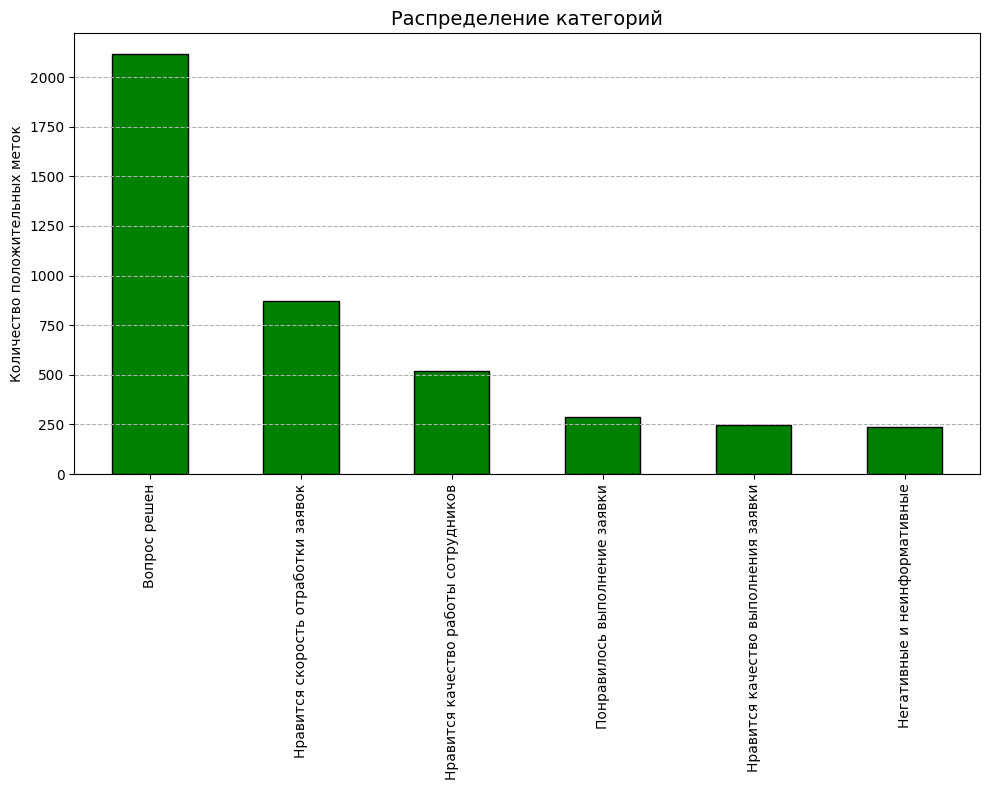

In [13]:
import matplotlib.pyplot as plt

label_counts = dt[categories].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
label_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title("Распределение категорий", fontsize=14)
plt.ylabel("Количество положительных меток")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

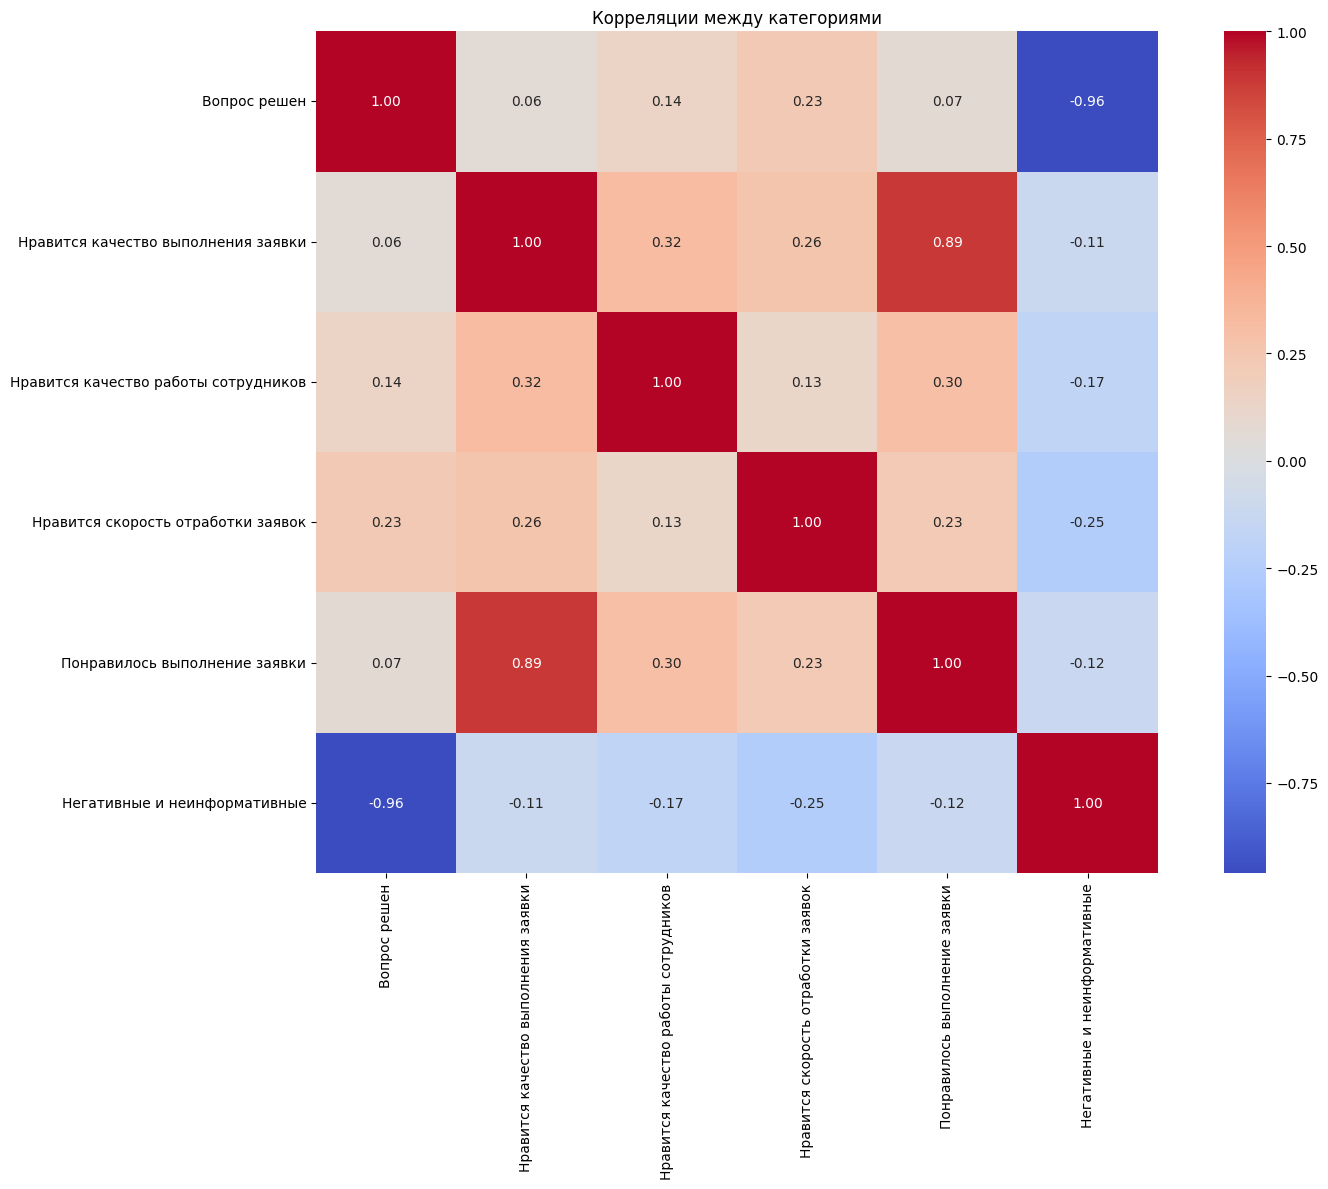

In [14]:
corr_matrix = dt[categories].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Корреляции между категориями")
plt.tight_layout()
plt.show()
